In [1]:
from os import listdir
from os.path import isfile, join
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
mypath = 'Datos_14oct_2' #path with files to analyze
from matplotlib.ticker import AutoMinorLocator
files = [f for f in listdir(mypath) if isfile(join(mypath, f))] #get all file names of that path
from scipy.optimize import curve_fit

In [2]:
def get_Error(file_name):
    #error analysis, where file_name is the name of the file to analyze
    #i dont include mypath as an arg bc it's a global variable
    file_dir = mypath + '/' + str(file_name)
    data = pd.read_csv(file_dir,sep=",",quotechar='"',parse_dates=["fecha"],na_values=[''])
    df = pd.DataFrame(data)
    df.sort_values(by=["fecha"])
    #dates formatting
    first_day = min(df["fecha"])
    last_day = max(df["fecha"])
    df["fecha"] -= first_day
    df.fecha = df.fecha.dt.days
    df = df.groupby(["fecha"], as_index=False).mean()
    df = df.to_numpy() #to numpy array (date,rho7d,inc14days,riskper10)
    #data analysis per se
    last = df.shape[0]
    df = np.hstack((df,np.zeros((last,1))))
    i = 19
    while i < last:
        df[i,4] = df[i-7,3]
        i = i+1
    error = df[19:,4]-df[19:,2]
    return error,df[19:,1]

In [105]:
#apparently theres like no function to make this thing i want
def make_hist(file_name,error,r_seven,bs,loc=2,save=False):
    error = error[:-10]
    r_seven = r_seven[:-10]
    error = abs(error)
    max_v = round(max(r_seven),1) 
    min_v = round(min(r_seven),1)
    print(file_name,max_v,min_v)
    r_bins = np.arange(min_v,max_v+bs,bs) #bin range
    rr_bins = np.arange(min_v,max_v+bs,bs*loc) #the loc factor comes into pay here
    n_size = r_bins.shape[0]-1 #amount of bins
    c_bins = np.zeros(n_size) #center of bins
    e_bins = np.zeros(n_size) #errors with same size
    o_bins = np.zeros(n_size) #amount of observations for that bin
    i = 0 #this is just a counter
    #now we count for each bin based on error
    cuenta = 0
    while i < n_size:
        indices1 = (i*bs<=r_seven)
        indices2 = (r_seven < (i+1)*bs)
        indices = indices1*indices2
        errores = np.copy(error[indices])
        cuenta = errores.shape[0]
        if errores.size == 0:
            m_errores = 0
        else:
            m_errores = np.mean(errores)
        e_bins[i] = m_errores
        o_bins[i] = cuenta
        c_bins[i] = (2*i+1)*(bs/2)
        i = i +1
    plt.figure()
    plt.title(str(file_name)+' - Error-R7 - bs = 0.2')
    ax = plt.axes()
    pos = np.arange(len(c_bins))
    ax.set_xticks(rr_bins)
    ax.set_xticklabels(())
    ax.set_xticklabels((rr_bins.round(2)))
    plt.xlabel(r'$R_7$',fontsize=12)
    plt.ylabel('Error',fontsize=12)
    ax.xaxis.set_minor_locator(AutoMinorLocator(2)) #for minor ticks to be visible its the easiest i could find tbh
    plt.xticks(fontsize=12,rotation=90)
    plt.bar(c_bins, e_bins, bs, color='r',edgecolor='k')
    #plt.savefig(str(file_name)+'_hist_0p4_sinult10dias.pdf')
    #plt.show()
    return c_bins,e_bins,o_bins

In [96]:
def save_data(b_centers,b_errors,c_obs,string):
    matriz = np.zeros((len(c_obs),3))
    matriz[:,0] = b_centers
    matriz[:,1] = b_errors
    matriz[:,2] = c_obs
    np.savetxt(string+'.txt',matriz,delimiter=',',header='Bin Centers,Abs Mean Error,Observations')

# grafico aca el tema de los errores - func de R7 (log-log)

In [4]:
def exponential(x,a,b):
    return a*(x**b)

# avellaneda

RiesgoAvellanedaNA
RiesgoAvellanedaNA 2.8 0.0
0 35
1 3
2 9
3 7
4 54
5 67
6 26
7 14
8 9
9 10
10 7
11 8
12 4
13 3


C:\Users\denis\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


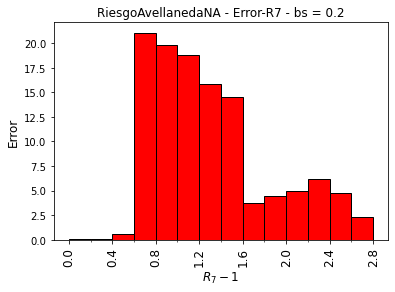

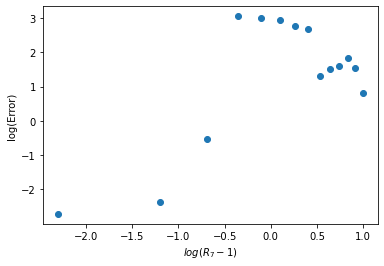

In [56]:
bs = 0.2
print(files[0])
error,r_seven = get_Error(files[0])
file_name = files[0]
b_centers,b_errors,c_obs = make_hist(file_name,error,r_seven,bs,loc=2)
plt.savefig('Riesgo_Avellaneda.pdf')
b_centers = b_centers[b_errors!=0]
b_errors = b_errors[b_errors!=0]
plt.scatter(np.log(b_centers),np.log(b_errors))
plt.xlabel(r'$log(R_7 - 1)$')
plt.ylabel(r'log(Error)')
plt.savefig('Avellaneda_1.pdf')

# bahia blanca

RiesgoBahíaBlanca
RiesgoBahíaBlanca 3.3 0.0
0 43
1 8
2 13
3 10
4 35
5 39
6 35
7 17
8 14
9 11
10 13
11 8
12 6
13 0
14 1
15 1
16 2


C:\Users\denis\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


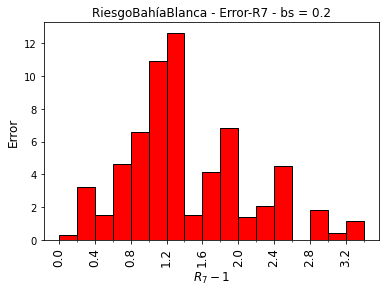

[0.1 0.3 0.5 0.7 0.9 1.1 1.3 1.5 1.7 1.9 2.1 2.3 2.5 2.7 2.9 3.1 3.3] [ 0.27144898  3.21761995  1.50408828  4.61816511  6.57064699 10.94518874
 12.65436312  1.52005692  4.11481924  6.85013508  1.40376777  2.04133784
  4.5243606   0.          1.84275326  0.41461948  1.15172079]


<Figure size 432x288 with 0 Axes>

In [57]:
bs = 0.2
file_name = files[1]
print(files[1])
error,r_seven = get_Error(files[1])
b_centers,b_errors,c_obs = make_hist(file_name,error,r_seven,bs,loc=2)
plt.savefig('Riesgo_BahiaBlanca.pdf')
print(b_centers,b_errors)

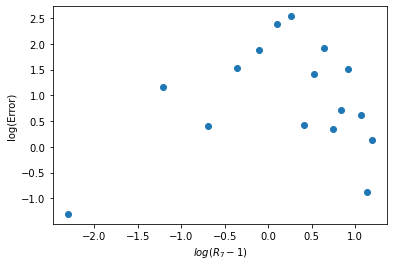

In [7]:
b_centers = b_centers[b_errors!=0]
b_errors = b_errors[b_errors!=0]
plt.scatter(np.log(b_centers),np.log(b_errors))
plt.xlabel(r'$log(R_7 - 1)$')
plt.ylabel(r'log(Error)')
plt.savefig('BahiaBlanca_1.pdf')

# bariloche

RiesgoBariloche
RiesgoBariloche 3.1 0.0


C:\Users\denis\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


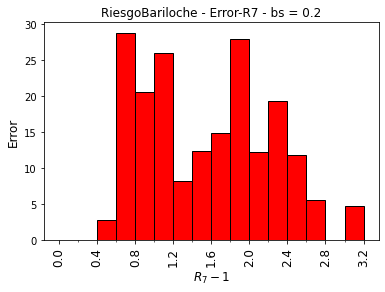

<Figure size 432x288 with 0 Axes>

In [8]:
bs = 0.2
print(files[2])
file_name = files[2]
error,r_seven = get_Error(files[2])
b_centers,b_errors,c_obs = make_hist(file_name,error,r_seven,bs,loc=2)
plt.savefig('Riesgo_Bariloche.pdf')

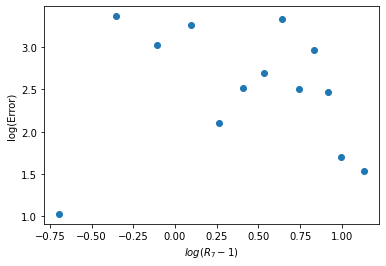

In [9]:
b_centers = b_centers[b_errors!=0]
b_errors = b_errors[b_errors!=0]
plt.scatter(np.log(b_centers),np.log(b_errors))
plt.xlabel(r'$log(R_7 - 1)$')
plt.ylabel(r'log(Error)')
plt.savefig('Bariloche_1.pdf')

# buenos aires

RiesgoBuenosAires
RiesgoBuenosAires 2.7 0.6


C:\Users\denis\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


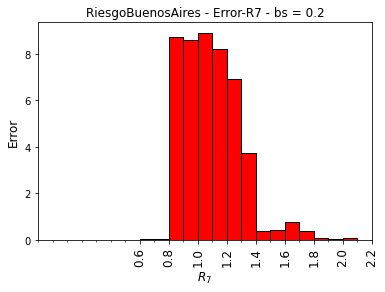

In [122]:
bs = 0.1
print(files[3])
file_name = files[3]
error,r_seven = get_Error(files[3])
b_centers,b_errors,c_obs = make_hist(file_name,error,r_seven,bs,loc=2)
plt.savefig('Hist_BuenosAires_2.pdf')

R7 maximo:  1.05
[0.55 0.65 0.75 0.85 0.95] [1.05 1.15 1.25 1.35 1.45 1.55 1.65 1.75 1.85 1.95 2.05]


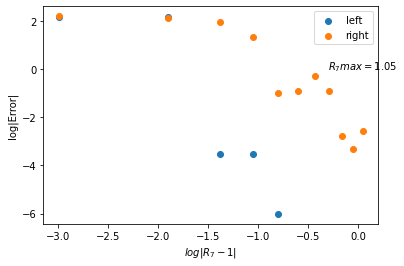

In [123]:
save_data(b_centers,b_errors,c_obs,'BuenosAires_hist_2')
b_centers = b_centers[b_errors!=0]
b_errors = b_errors[b_errors!=0]
max_errors = np.argmax(b_errors)
max_rseven = b_centers[max_errors]
print('R7 maximo: ',max_rseven)
#separo a un lado
b_centers_1 = b_centers[:max_errors]
b_errors_1 = b_errors[:max_errors]
#separo al otro lado
b_centers_2 = b_centers[max_errors:]
b_errors_2 = b_errors[max_errors:]
#imprimo a ver si esta bien
print(b_centers_1,b_centers_2)
#grafico
plt.scatter(np.log(np.abs(b_centers_1-1)),np.log(b_errors_1),label='left')
plt.scatter(np.log(np.abs(b_centers_2-1)),np.log(b_errors_2),label='right')
plt.xlabel(r'$log|R_7 - 1|$')
plt.ylabel(r'log|Error|')
plt.legend()
plt.text(-0.3,0,r'$R_7 max = $'+str(max_rseven))
plt.savefig('BuenosAires_2.pdf')

# CABA TOTAL

RiesgoCABACABANA
RiesgoCABACABANA 3.6 0.0


C:\Users\denis\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


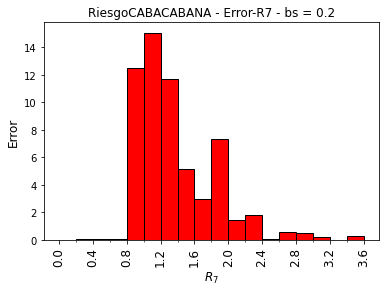

In [108]:
bs = 0.2
print(files[4])
file_name = files[4]
error,r_seven = get_Error(files[4])
b_centers,b_errors,c_obs = make_hist(file_name,error,r_seven,bs,loc=2)
plt.savefig('Hist_CABA.pdf')

R7 maximo:  1.1
[0.3 0.5 0.7 0.9] [1.1 1.3 1.5 1.7 1.9 2.1 2.3 2.5 2.7 2.9 3.1 3.5]


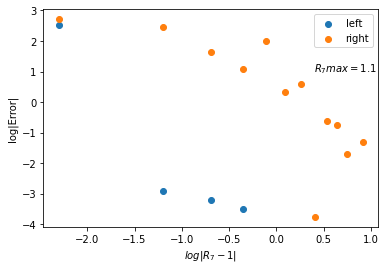

In [109]:
save_data(b_centers,b_errors,c_obs,'CABA_hist')
b_centers = b_centers[b_errors!=0]
b_errors = b_errors[b_errors!=0]
max_errors = np.argmax(b_errors)
max_rseven = b_centers[max_errors]
print('R7 maximo: ',max_rseven)
#separo a un lado
b_centers_1 = b_centers[:max_errors]
b_errors_1 = b_errors[:max_errors]
#separo al otro lado
b_centers_2 = b_centers[max_errors:]
b_errors_2 = b_errors[max_errors:]
#imprimo a ver si esta bien
print(b_centers_1,b_centers_2)
#grafico
plt.scatter(np.log(np.abs(b_centers_1-1)),np.log(b_errors_1),label='left')
plt.scatter(np.log(np.abs(b_centers_2-1)),np.log(b_errors_2),label='right')
plt.xlabel(r'$log|R_7 - 1|$')
plt.ylabel(r'log|Error|')
plt.legend()
plt.text(0.4,1,r'$R_7 max = $'+str(max_rseven))
plt.savefig('CABA_1.pdf')

# cordoba capital

RiesgoCórdobaCapital
RiesgoCórdobaCapital 3.3 0.0


C:\Users\denis\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


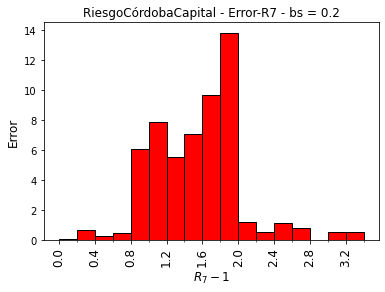

<Figure size 432x288 with 0 Axes>

In [14]:
bs = 0.2
print(files[6])
file_name = files[6]
error,r_seven = get_Error(files[6])
b_centers,b_errors,c_obs = make_hist(file_name,error,r_seven,bs,loc=2)
plt.savefig('Riesgo_CordobaCapital.pdf')

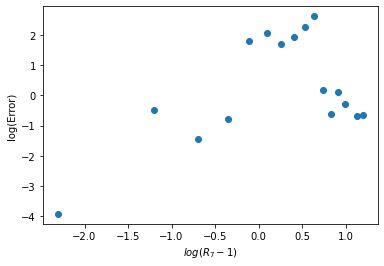

In [15]:
b_centers = b_centers[b_errors!=0]
b_errors = b_errors[b_errors!=0]
plt.scatter(np.log(b_centers),np.log(b_errors))
plt.xlabel(r'$log(R_7 - 1)$')
plt.ylabel(r'log(Error)')
plt.savefig('CordobaCapital_1.pdf')

# cordoba provincia

RiesgoCórdobaCórdoba
RiesgoCórdobaCórdoba 3.6 0.0


C:\Users\denis\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


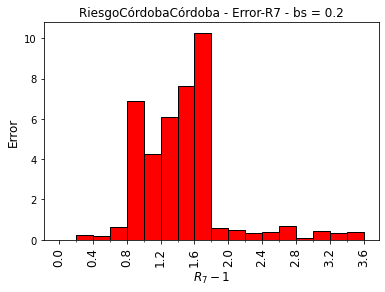

<Figure size 432x288 with 0 Axes>

In [16]:
bs = 0.2
print(files[7])
file_name = files[7]
error,r_seven = get_Error(files[7])
b_centers,b_errors,c_obs = make_hist(file_name,error,r_seven,bs,loc=2)
plt.savefig('Riesgo_CordobaProv.pdf')

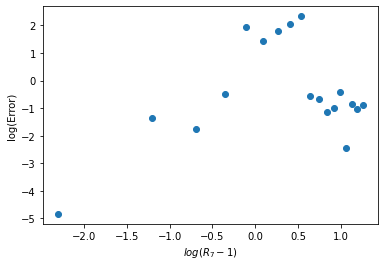

In [17]:
b_centers = b_centers[b_errors!=0]
b_errors = b_errors[b_errors!=0]
plt.scatter(np.log(b_centers),np.log(b_errors))
plt.xlabel(r'$log(R_7 - 1)$')
plt.ylabel(r'log(Error)')
plt.savefig('CordobaProv_1.pdf')

# rio negro

RiesgoRioNegro
RiesgoRioNegro 3.2 0.0


C:\Users\denis\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


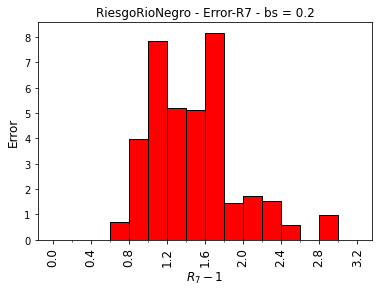

<Figure size 432x288 with 0 Axes>

In [18]:
bs = 0.2
print(files[9])
file_name = files[9]
error,r_seven = get_Error(files[9])
b_centers,b_errors,c_obs = make_hist(file_name,error,r_seven,bs,loc=2)
plt.savefig('Riesgo_RioNegroProv.pdf')

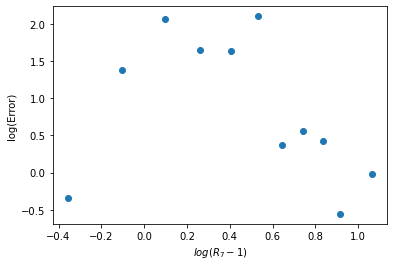

In [19]:
b_centers = b_centers[b_errors!=0]
b_errors = b_errors[b_errors!=0]
plt.scatter(np.log(b_centers),np.log(b_errors))
plt.xlabel(r'$log(R_7 - 1)$')
plt.ylabel(r'log(Error)')
plt.savefig('RioNegroProv_1.pdf')

# rosario

RiesgoSantaFeRosario
RiesgoSantaFeRosario 3.7 0.0


C:\Users\denis\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


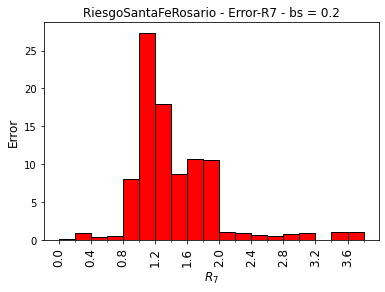

In [124]:
bs = 0.2
print(files[11])
file_name = files[11]
error,r_seven = get_Error(files[11])
b_centers,b_errors,c_obs = make_hist(file_name,error,r_seven,bs,loc=2)
plt.savefig('Hist_Rosario.pdf')

R7 maximo:  1.1
[0.1 0.3 0.5 0.7 0.9] [1.1 1.3 1.5 1.7 1.9 2.1 2.3 2.5 2.7 2.9 3.1 3.5 3.7]


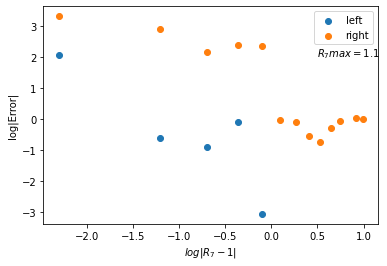

In [125]:
save_data(b_centers,b_errors,c_obs,'Rosario_hist')
b_centers = b_centers[b_errors!=0]
b_errors = b_errors[b_errors!=0]
max_errors = np.argmax(b_errors)
max_rseven = b_centers[max_errors]
print('R7 maximo: ',max_rseven)
#separo a un lado
b_centers_1 = b_centers[:max_errors]
b_errors_1 = b_errors[:max_errors]
#separo al otro lado
b_centers_2 = b_centers[max_errors:]
b_errors_2 = b_errors[max_errors:]
#imprimo a ver si esta bien
print(b_centers_1,b_centers_2)
#grafico
plt.scatter(np.log(np.abs(b_centers_1-1)),np.log(b_errors_1),label='left')
plt.scatter(np.log(np.abs(b_centers_2-1)),np.log(b_errors_2),label='right')
plt.xlabel(r'$log|R_7 - 1|$')
plt.ylabel(r'log|Error|')
plt.legend()
plt.text(0.5,2,r'$R_7 max = $'+str(max_rseven))
plt.savefig('Rosario_1.pdf')

# santa fe 

RiesgoSantaFeSantaFe
RiesgoSantaFeSantaFe 4.0 0.0


C:\Users\denis\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


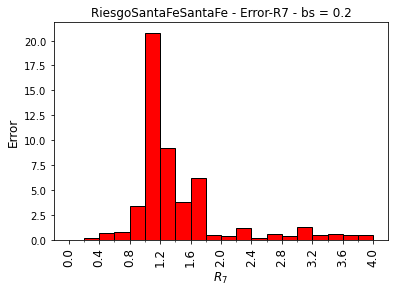

In [106]:
bs = 0.2
print(files[12])
file_name = files[12]
error,r_seven = get_Error(files[12])
b_centers,b_errors,c_obs = make_hist(file_name,error,r_seven,bs,loc=2)
plt.savefig('Hist_StaFe.pdf')

R7 maximo:  1.1
[0.3 0.5 0.7 0.9] [1.1 1.3 1.5 1.7 1.9 2.1 2.3 2.5 2.7 2.9 3.1 3.3 3.5 3.7 3.9]


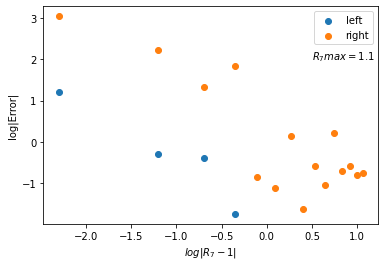

In [104]:
save_data(b_centers,b_errors,c_obs,'StaFe_hist')
b_centers = b_centers[b_errors!=0]
b_errors = b_errors[b_errors!=0]
max_errors = np.argmax(b_errors)
max_rseven = b_centers[max_errors]
print('R7 maximo: ',max_rseven)
#separo a un lado
b_centers_1 = b_centers[:max_errors]
b_errors_1 = b_errors[:max_errors]
#separo al otro lado
b_centers_2 = b_centers[max_errors:]
b_errors_2 = b_errors[max_errors:]
#imprimo a ver si esta bien
print(b_centers_1,b_centers_2)
#grafico
plt.scatter(np.log(np.abs(b_centers_1-1)),np.log(b_errors_1),label='left')
plt.scatter(np.log(np.abs(b_centers_2-1)),np.log(b_errors_2),label='right')
plt.xlabel(r'$log|R_7 - 1|$')
plt.ylabel(r'log|Error|')
plt.legend()
plt.text(0.5,2,r'$R_7 max = $'+str(max_rseven))
plt.savefig('StaFe_1.pdf')